# High-level introduction to <code>pandas</code>
For a more complete introduction to <code>pandas</code>, see [https://pandas.pydata.org/](https://pandas.pydata.org/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [2]:
data = np.random.randn(20)
index = range(1990, 2010)

In [3]:
print (data)
print (index)

[-0.2196044  -0.15966019 -1.00769185  0.76921341  0.41199323 -0.72913889
 -1.32219441  0.67646282 -0.75369589 -0.91411636  1.03885204 -0.67724518
  0.6196653   1.67062038  1.33618315  0.606179    0.25826454 -0.59867337
 -1.71565242 -0.99890934]
range(1990, 2010)


In [4]:
y = pd.Series(data, index=index)

In [7]:
print (y)

1990   -0.219604
1991   -0.159660
1992   -1.007692
1993    0.769213
1994    0.411993
1995   -0.729139
1996   -1.322194
1997    0.676463
1998   -0.753696
1999   -0.914116
2000    1.038852
2001   -0.677245
2002    0.619665
2003    1.670620
2004    1.336183
2005    0.606179
2006    0.258265
2007   -0.598673
2008   -1.715652
2009   -0.998909
dtype: float64


In [14]:
salaries = {
    'gino': 1500, 'maria': 2560.34, 'luca': None, 'federico': 2451
}

In [15]:
s = pd.Series(salaries)

In [16]:
print (s)

gino        1500.00
maria       2560.34
luca            NaN
federico    2451.00
dtype: float64


In [17]:
k = pd.Series({
    'a': 'v', 'b': None
})

In [18]:
print (k)

a       v
b    None
dtype: object


### Access series as arrays

In [19]:
print (s[:2], '\n')
print (s[s > s.median()], '\n')
print (np.log(s), '\n')
print (s + s, '\n')
print (s * 3, '\n')
print (y[4:8] + y[4:10])

gino     1500.00
maria    2560.34
dtype: float64 

maria    2560.34
dtype: float64 

gino        7.313220
maria       7.847895
luca             NaN
federico    7.804251
dtype: float64 

gino        3000.00
maria       5120.68
luca            NaN
federico    4902.00
dtype: float64 

gino        4500.00
maria       7681.02
luca            NaN
federico    7353.00
dtype: float64 

1994    0.823986
1995   -1.458278
1996   -2.644389
1997    1.352926
1998         NaN
1999         NaN
dtype: float64


### Access series as dictionaries

# Data Frames
From [http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

In [20]:
k = {'years': y, 'salaries': s}
df = pd.DataFrame(k)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


In [21]:
print (df)

             years  salaries
1990     -0.219604       NaN
1991     -0.159660       NaN
1992     -1.007692       NaN
1993      0.769213       NaN
1994      0.411993       NaN
1995     -0.729139       NaN
1996     -1.322194       NaN
1997      0.676463       NaN
1998     -0.753696       NaN
1999     -0.914116       NaN
2000      1.038852       NaN
2001     -0.677245       NaN
2002      0.619665       NaN
2003      1.670620       NaN
2004      1.336183       NaN
2005      0.606179       NaN
2006      0.258265       NaN
2007     -0.598673       NaN
2008     -1.715652       NaN
2009     -0.998909       NaN
gino           NaN   1500.00
maria          NaN   2560.34
luca           NaN       NaN
federico       NaN   2451.00


In [22]:
data = {}
for k, v in s.items():
    data[k] = {}
    for d, w in y.items():
        data[k][d] = v + (v*w)

In [24]:
ydf = pd.DataFrame(data)

In [25]:
print (ydf)

             gino        maria  luca     federico
1990  1170.593407  1998.078083   NaN  1912.749627
1991  1260.509710  2151.555621   NaN  2059.672866
1992   -11.537772   -19.693746   NaN   -18.852719
1993  2653.820112  4529.787857   NaN  4336.342063
1994  2117.989851  3615.182756   NaN  3460.795416
1995   406.291665   693.496535   NaN   663.880581
1996  -483.291619  -824.927242   NaN  -789.698505
1997  2514.694228  4292.314813   NaN  4109.010368
1998   369.456170   630.622273   NaN   603.691382
1999   128.825464   219.891325   NaN   210.500808
2000  3058.278055  5220.154423   NaN  4997.226341
2001   484.132234   826.362083   NaN   791.072071
2002  2429.497953  4146.893859   NaN  3969.799655
2003  4005.930563  6837.696172   NaN  6545.690540
2004  3504.274727  5981.423170   NaN  5725.984904
2005  2409.268506  4112.364352   NaN  3936.744740
2006  1887.396805  3221.585024   NaN  3084.006380
2007   601.989941  1027.532616   NaN   983.651563
2008 -1073.478633 -1832.313523   NaN -1754.064087


In [26]:
ydf.head()

,gino,maria,luca,federico
1990,1170.593407,1998.078083,NaN,1912.749627
1991,1260.509710,2151.555621,NaN,2059.672866
1992,-11.537772,-19.693746,NaN,-18.852719
1993,2653.820112,4529.787857,NaN,4336.342063
1994,2117.989851,3615.182756,NaN,3460.795416


In [27]:
pd.DataFrame.from_dict(data, orient='index').head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
federico,1912.749627,2059.672866,-18.852719,4336.342063,3460.795416,663.880581,-789.698505,4109.010368,603.691382,210.500808,4997.226341,791.072071,3969.799655,6545.690540,5725.984904,3936.744740,3084.006380,983.651563,-1754.064087,2.673198
gino,1170.593407,1260.509710,-11.537772,2653.820112,2117.989851,406.291665,-483.291619,2514.694228,369.456170,128.825464,3058.278055,484.132234,2429.497953,4005.930563,3504.274727,2409.268506,1887.396805,601.989941,-1073.478633,1.635984
luca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maria,1998.078083,2151.555621,-19.693746,4529.787857,3615.182756,693.496535,-824.927242,4292.314813,630.622273,219.891325,5220.154423,826.362083,4146.893859,6837.696172,5981.423170,4112.364352,3221.585024,1027.532616,-1832.313523,2.792451


## Loading and manipulating data
Retrieve the complete local dataset from <a href="https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales">Kaggle website</a>.

In [28]:
accidents = '../../data/trafficsample.csv'
A = pd.read_csv(accidents, low_memory=False, index_col=0)

In [29]:
A.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
175309,201243N075042,497930,188010,-0.588005,51.582399,43,3,2,1,04/04/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,2,Yes,E01017821,2012
53367,2.01E+12,621820,309050,1.276633,52.633805,36,3,2,1,23/12/2013,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01026840,2013
85873,201305DD03109,352450,397563,-2.717854,53.472632,5,2,5,3,14/06/2013,...,No physical crossing within 50 meters,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,1,Yes,E01006852,2013
359233,201243N210022,479520,194780,-0.852115,51.646155,43,3,1,1,21/02/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01017916,2012
340672,201401GD11000,535170,185350,-0.051837,51.550802,1,3,2,1,09/12/2014,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,Pedestrian in carriageway (not injured),1,Yes,E01001734,2014


In [30]:
A[['Date', 'Time']].head()

,Date,Time
175309,04/04/2012,20:49
53367,23/12/2013,12:40
85873,14/06/2013,16:48
359233,21/02/2012,07:39
340672,09/12/2014,14:30


In [31]:
A.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [32]:
from datetime import datetime

def todate(d, t):
    try:
        dt = datetime.strptime(" ".join([d, t]), '%d/%m/%Y %H:%M')
    except TypeError:
        dt = np.nan
    return dt

In [33]:
A['Datetime'] = [todate(x.Date, x.Time) for i, x in A.iterrows()]

In [34]:
A.shape

(10000, 34)

In [36]:
A.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                                   object
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Typ

## Access dataframe by index and col

In [37]:
A.iloc[2:6] # gets rows (or columns) at particular positions in the index (so it only takes integers).

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Datetime
85873,201305DD03109,352450,397563,-2.717854,53.472632,5,2,5,3,14/06/2013,...,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,1,Yes,E01006852,2013,2013-06-14 16:48:00
359233,201243N210022,479520,194780,-0.852115,51.646155,43,3,1,1,21/02/2012,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01017916,2012,2012-02-21 07:39:00
340672,201401GD11000,535170,185350,-0.051837,51.550802,1,3,2,1,09/12/2014,...,Daylight: Street light present,Fine without high winds,Dry,None,Pedestrian in carriageway (not injured),1,Yes,E01001734,2014,2014-12-09 14:30:00
369203,201342I202807,550055,223249,0.179006,51.887560,42,3,3,2,15/07/2013,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01022087,2013,2013-07-15 11:20:00


In [38]:
A.loc[[85873, 340672]] # gets rows (or columns) with particular labels from the index

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Datetime
85873,201305DD03109,352450,397563,-2.717854,53.472632,5,2,5,3,14/06/2013,...,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,1,Yes,E01006852,2013,2013-06-14 16:48:00
340672,201401GD11000,535170,185350,-0.051837,51.550802,1,3,2,1,09/12/2014,...,Daylight: Street light present,Fine without high winds,Dry,None,Pedestrian in carriageway (not injured),1,Yes,E01001734,2014,2014-12-09 14:30:00


In [39]:
selection = A[A['Road_Surface_Conditions'] == 'Dry'].sort_values(
    'Number_of_Casualties', ascending=False)
selection[['Weather_Conditions', 'Police_Force', 
           'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties']].head()

,Weather_Conditions,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties
342377,Fine without high winds,61,3,2,21
21228,Fine without high winds,50,3,2,10
47734,Fine without high winds,44,2,1,10
387706,Fine without high winds,5,3,5,9
301798,Unknown,6,3,2,9


In [ ]:
selection[['Weather_Conditions', 'Police_Force', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties']].groupby('Weather_Conditions').mean()

In [40]:
sel = selection[['Weather_Conditions', 'Police_Force', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties', 'Datetime']]

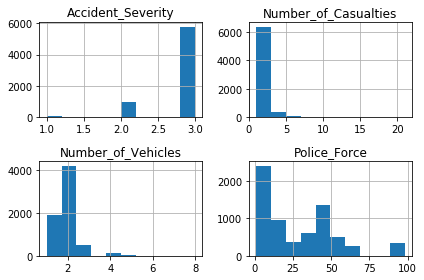

In [41]:
sel.hist()
plt.tight_layout()
plt.show()

In [42]:
minutes = []
for i, row in sel.iterrows():
    h, m = row['Datetime'].hour, row['Datetime'].minute
    minutes.append(h*60 + m)
sel = sel.copy()
sel['Minutes'] = minutes

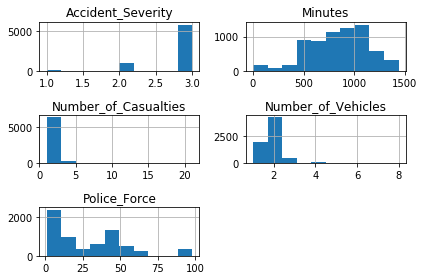

In [43]:
sel.hist()
plt.tight_layout()
plt.show()

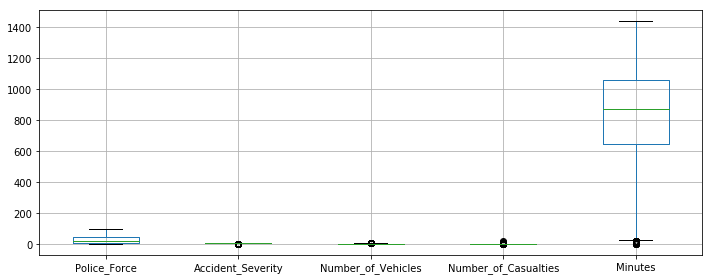

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), sharey=True)
sel.boxplot(ax=axes)
plt.tight_layout()
plt.show()

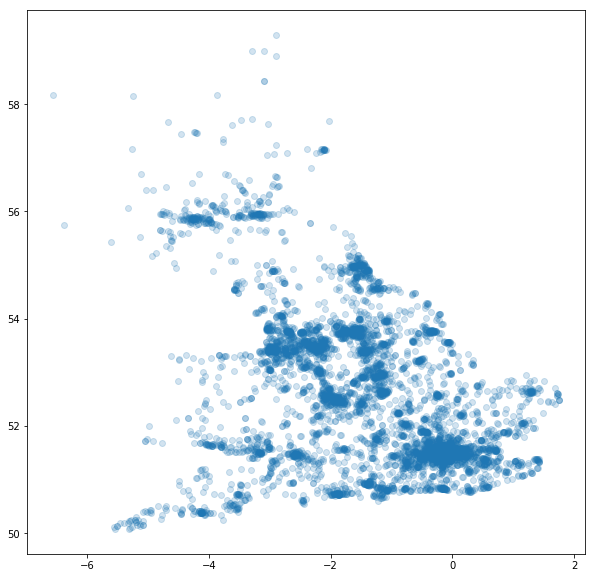

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
axes.scatter(selection.Longitude.values, selection.Latitude.values, alpha=0.2)
plt.show()

In [46]:
import geopandas as gpd

In [47]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [48]:
UK = world[world['iso_a3']=='GBR']

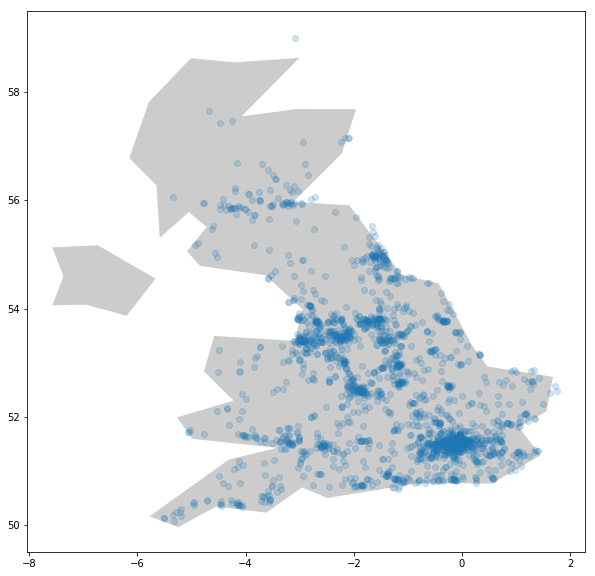

In [49]:
limit = 2000
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
UK.plot(ax=axes, color='#CCCCCC')
axes.scatter(selection.Longitude.values[:limit], selection.Latitude.values[:limit], alpha=0.2)
plt.show()

# Example 1: k-means
Implement k-means using <code>NumPy</code> and functions